<a href="https://colab.research.google.com/github/anugrahfitra/fin_6/blob/main/DemoDay_FIN6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>Step 1 : Import Library</strong>
<br>Import library-library python yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

<strong>Step 2 : Load Data</strong>
<br>Load data dari file csv ke pandas data frame. Dan Melakukan analisa awal data.

In [3]:
df1 = pd.read_csv('/content/train.csv', sep=';')
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<strong>Step 3 : Visualisasi Data</strong>
<br>Untuk kebutuhan analisa data

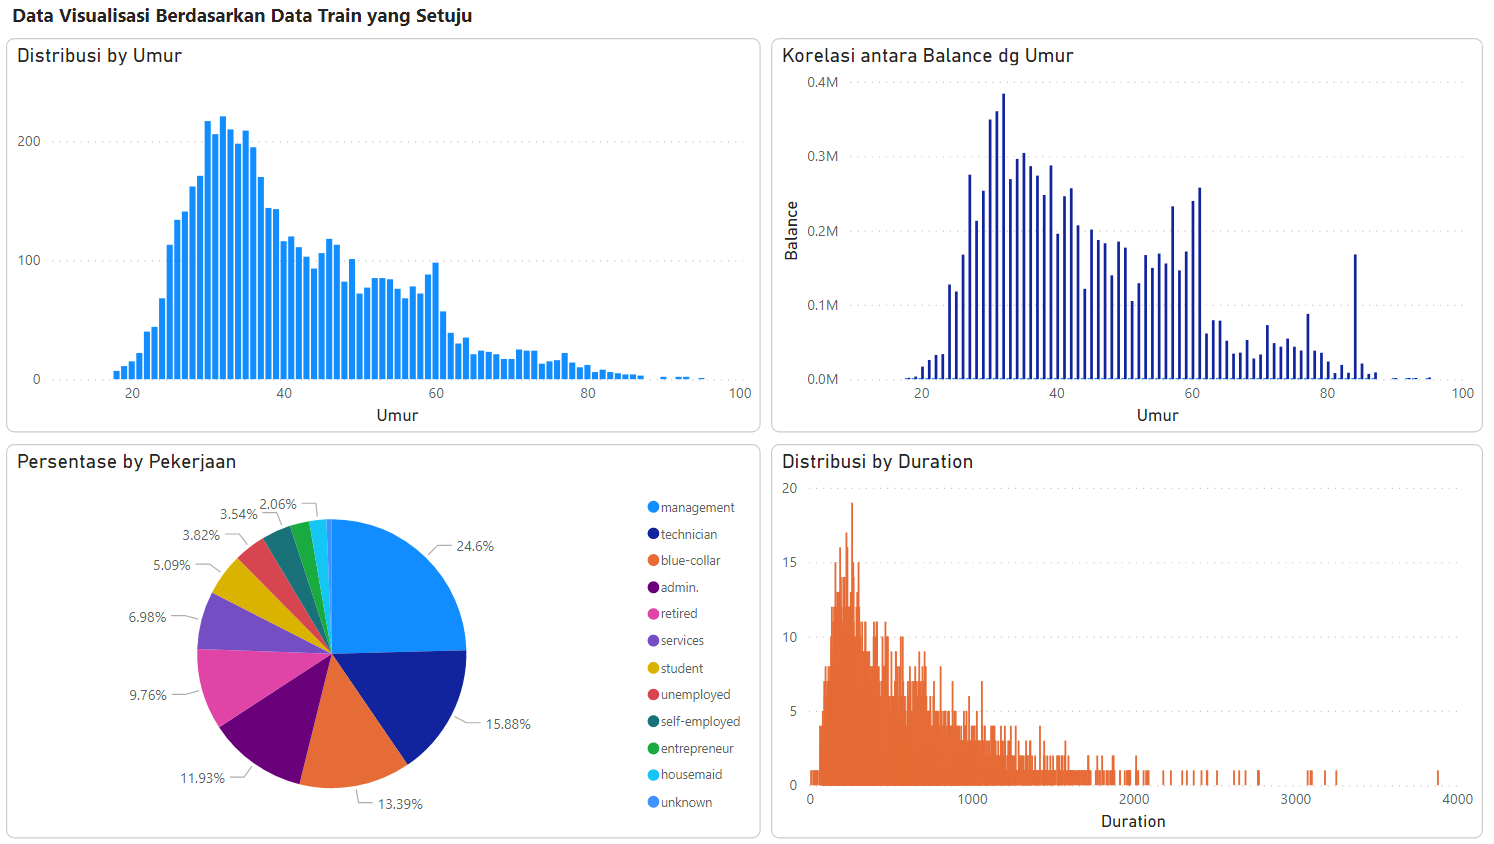

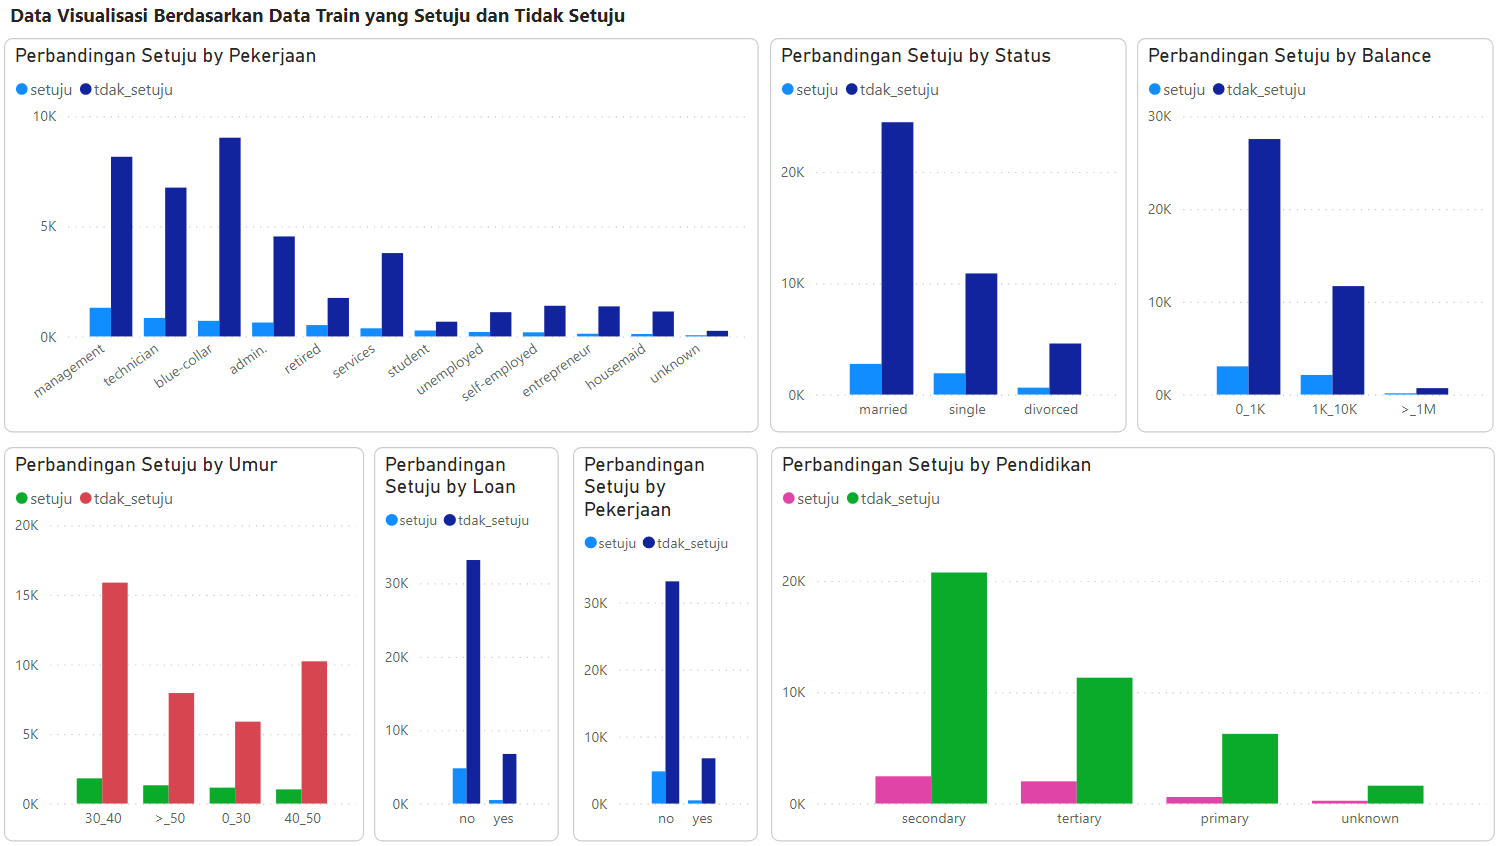

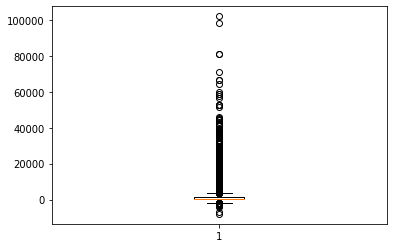

In [5]:
#Melihat sebaran data untuk variable/kolom/feature Penghasilan
plt.boxplot(df1['balance'])
plt.show()

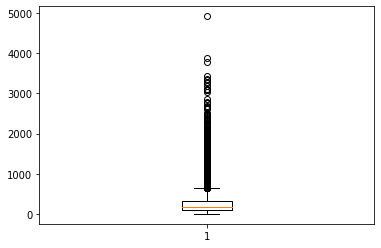

In [6]:
#Melihat sebaran data untuk variable/kolom/feature Penghasilan
plt.boxplot(df1['duration'])
plt.show()

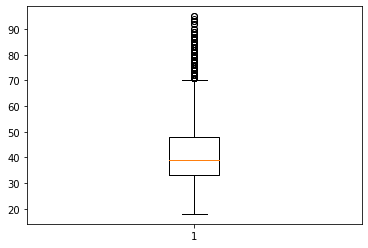

In [7]:
plt.boxplot(df1['age'])
plt.show()

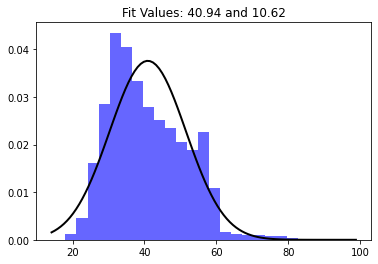

In [8]:
mu, std = norm.fit(df1['age']) 
plt.hist(df1['age'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

<strong>Step 4 : Data Preparation (Cleansing)</strong>
<br>1. Hilangkan pencilan di Balance dg di replace dg nilai Median-nya
<br>2. Hilangkan pencilan di Duration dg di replace dg nilai Median-nya
<br>3. Hilangkan job yang 'unknown'

In [9]:
#Replace pencilan balance
nilai_median = df1['balance'].median()
df1.loc[df1['balance'] >= 75000, 'balance'] = nilai_median
df1[df1['balance'] >= 100].count()['balance']

32774

In [10]:
#Replace pencilan duration
nilai_median = df1['duration'].median()
df1.loc[df1['duration'] >= 3500, 'duration'] = nilai_median
df1[df1['duration'] >= 100].count()['duration']

34487

In [11]:
#drop job unknown
where_clause = df1.job == 'unknown'
df1.drop(df1[where_clause].index, axis = 0, inplace = False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
# Load data tes

df2 = pd.read_csv('/content/test.csv', sep=';')

df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
# Mempersiapkan dataset untuk dimasukkan ke model

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

X_train = df1[['age','balance','duration']]
X_test = df2[['age','balance','duration']]

labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(df1['y'])
y_test = labelencoder.fit_transform(df2['y'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [14]:
# Membuat pipeline model machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression (solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [15]:
# Mendapatkan metriks untuk semua model machine learning

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve (y_test, y_pred)
    auc_list.append(round (metrics. auc (fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

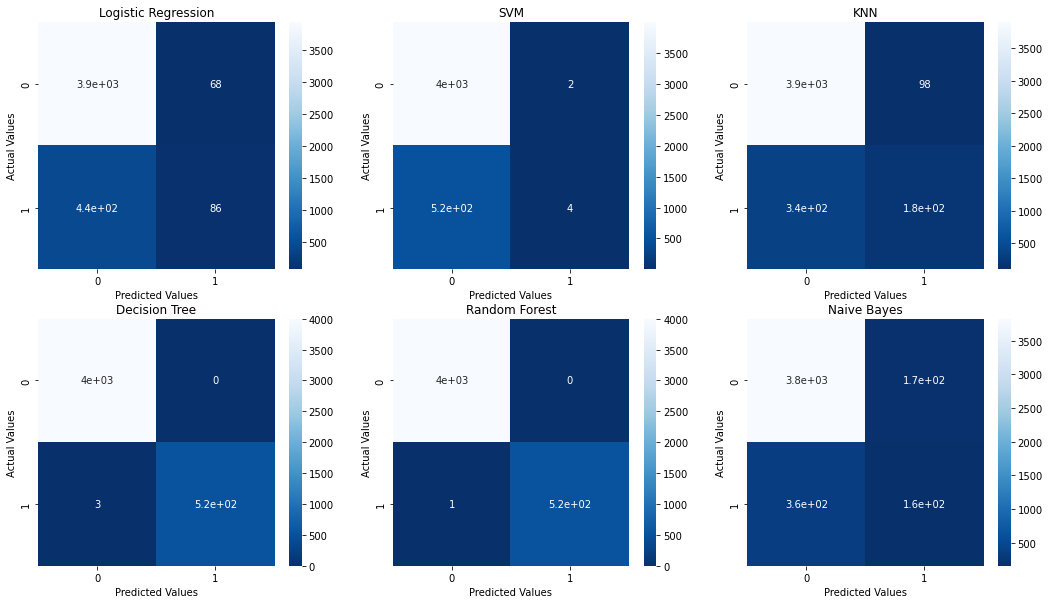

In [16]:
# plot confusion matrix

import seaborn as sns

fig = plt.figure(figsize = (18,10)) 
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot = sns.heatmap (cm, annot=True, cmap = 'Blues_r') 
  cm_plot.set_xlabel('Predicted Values') 
  cm_plot.set_ylabel('Actual Values')

In [17]:
# Accuracy and AUC 

result_df = pd.DataFrame({' Model' :model_list, 'Accuracy':acc_list, 'AUC': auc_list}) 
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.888741,0.57
1,SVM,0.885202,0.50
2,KNN,0.902013,0.66
3,Decision Tree,0.999336,1.00
4,Random Forest,0.999779,1.00
5,Naive Bayes,0.880779,0.63


In [35]:
# Membuat model dengan Deep Neural Network

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
                                    layers.Dense(16, activation="relu", input_shape=[3]),
                                    layers.Dropout(0.2),
                                    layers.Dense(1, activation="sigmoid")
                                    ])


In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                64        
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = 'accuracy')

In [38]:
history = model.fit(X_train, y_train, batch_size=5000, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 42ms/step - loss: 146.9577 - accuracy: 0.4989 - val_loss: 121.3909 - val_accuracy: 0.4419
Epoch 2/10
10/10 [==============================] - 0s 15ms/step - loss: 116.1127 - accuracy: 0.5399 - val_loss: 83.6733 - val_accuracy: 0.4680
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 91.5442 - accuracy: 0.5718 - val_loss: 48.2740 - val_accuracy: 0.5346
Epoch 4/10
10/10 [==============================] - 0s 16ms/step - loss: 69.4221 - accuracy: 0.6297 - val_loss: 18.5602 - val_accuracy: 0.7560
Epoch 5/10
10/10 [==============================] - 0s 12ms/step - loss: 55.5622 - accuracy: 0.7316 - val_loss: 15.2236 - val_accuracy: 0.8848
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 52.0422 - accuracy: 0.7573 - val_loss: 16.1057 - val_accuracy: 0.8848
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 49.8662 - accuracy: 0.7593 - val_loss: 15.6681 - val_accuracy: 0.8

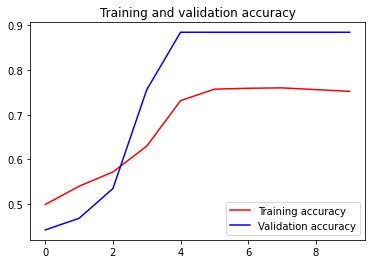

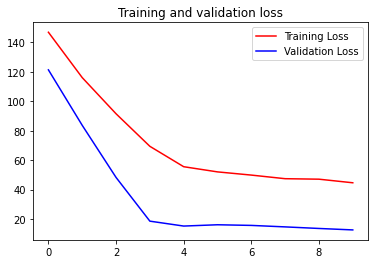

In [40]:
# Visualisasi Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()